In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_set = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_set = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_set.shape

(1460, 81)

In [6]:
train_set.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [7]:
(train_set.isna().sum()[train_set.isna().sum()!=0].sort_values(ascending=False)/train_set.shape[0])*100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [8]:
null_sr = train_set.isna().sum()[train_set.isna().sum()!=0].sort_values(ascending=False)
for feat in null_sr.keys():
    try:
        print(feat, ' - ', train_set[feat].dtype, ' - ', train_set.corr().loc[feat,'SalePrice'])
    except KeyError:
        print(feat, ' - ', train_set[feat].dtype,  ' - ', 'None')

PoolQC  -  object  -  None
MiscFeature  -  object  -  None
Alley  -  object  -  None
Fence  -  object  -  None
FireplaceQu  -  object  -  None
LotFrontage  -  float64  -  0.35179909657067737
GarageType  -  object  -  None
GarageYrBlt  -  float64  -  0.4863616774878596
GarageFinish  -  object  -  None
GarageQual  -  object  -  None
GarageCond  -  object  -  None
BsmtExposure  -  object  -  None
BsmtFinType2  -  object  -  None
BsmtFinType1  -  object  -  None
BsmtCond  -  object  -  None
BsmtQual  -  object  -  None
MasVnrArea  -  float64  -  0.47749304709571444
MasVnrType  -  object  -  None
Electrical  -  object  -  None


In [9]:
train_cp = train_set.copy()
train_cp.drop(columns=['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],inplace=True)
train_cp.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
train_cp.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
obj_cols = train_cp.dtypes.sort_values()

for cols in obj_cols.index:
    if obj_cols[cols]!="object":
        print(cols)

MSSubClass
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
BsmtFinSF2
BsmtFinSF1
SalePrice
OverallQual
LotArea
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
GarageYrBlt


In [12]:
from sklearn.compose import make_column_selector as selector

X = train_cp.drop(columns=['SalePrice'])
y = train_cp['SalePrice']

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
numerical_columns = list(set(numerical_columns) - set(['MSSubClass','OverallQual','OverallCond']))
categorical_columns = categorical_columns_selector(X) + ['MSSubClass','OverallQual','OverallCond']

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

categorical_prepro = Pipeline([
    ('simpute_cat', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_prepro = Pipeline([
    ('simpute_num', SimpleImputer(strategy="median")),
    ('sscaler', StandardScaler())
])
    
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_prepro, numerical_columns),
    ('cat', categorical_prepro, categorical_columns),
])

lin_model = Pipeline([
    ('prepro', preprocessor),
    ('linreg', LinearRegression())
])


In [14]:
from sklearn.model_selection import cross_val_score


xval = cross_val_score(lin_model, X, y, cv=10)

In [15]:
print(xval.mean(), xval.std())

0.8219854339366661 0.1210187596043048


## **More Analysis**

<AxesSubplot:>

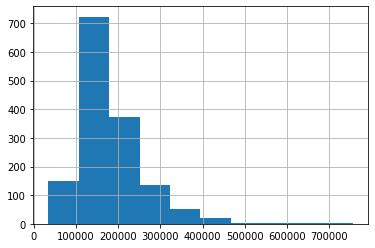

In [16]:
train_cp['SalePrice'].hist()

In [17]:
train_cp['SalePrice_Cat'] = pd.cut(train_cp['SalePrice'],bins=[0,100000,200000,300000,400000,500000,np.inf], labels=[0,1,2,3,4,5])
train_cp['SalePrice_Cat'].value_counts()

1    910
2    312
0    123
3     87
4     19
5      9
Name: SalePrice_Cat, dtype: int64

In [18]:
pd.crosstab(index=train_cp['MSSubClass'], columns=train_cp['SalePrice_Cat'])

SalePrice_Cat,0,1,2,3,4,5
MSSubClass,,,,,,
20,24,343,120,39,7,3
30,39,30,0,0,0,0
40,1,2,1,0,0,0
45,4,8,0,0,0,0
50,18,109,13,3,1,0
60,0,121,127,35,10,6
70,4,42,12,2,0,0
75,0,11,3,1,1,0
80,0,54,3,1,0,0


In [19]:
from scipy.stats import chi2_contingency

for cat in categorical_columns:
    pvalue = chi2_contingency(pd.crosstab(index=train_cp[cat], columns=train_cp['SalePrice_Cat']))[1]
    if pvalue > 0.05:
        print(cat,': ',pvalue)

Street :  0.40131256298757184
Utilities :  0.9877819622782419
LandSlope :  0.3922823077836337
Condition2 :  0.259141760373944


In [20]:
train_cp.drop(columns=['Street','Utilities','LandSlope','Condition2'],inplace=True)

In [21]:
def linreg(df,x_drop, y_col):
    X = df.drop(columns=x_drop)
    y = df[y_col]

    numerical_columns_selector = selector(dtype_exclude=object)
    categorical_columns_selector = selector(dtype_include=object)

    numerical_columns = numerical_columns_selector(X)
    numerical_columns = list(set(numerical_columns) - set(['MSSubClass','OverallQual','OverallCond']))
    categorical_columns = categorical_columns_selector(X) + ['MSSubClass','OverallQual','OverallCond']

    categorical_prepro = Pipeline([
        ('simpute_cat', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    numerical_prepro = Pipeline([
        ('simpute_num', SimpleImputer(strategy="median")),
        ('sscaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numerical_prepro, numerical_columns),
        ('cat', categorical_prepro, categorical_columns),
    ])

    lin_model = Pipeline([
        ('prepro', preprocessor),
        ('linreg', LinearRegression())
    ])

    xval = cross_val_score(lin_model, X, y, cv=10)

    return xval.mean(), xval.std()

In [22]:
linreg(train_cp,['SalePrice','SalePrice_Cat'],'SalePrice')

(0.8426958577238504, 0.09996375063205194)

## **Statsmodel Analysis**

In [23]:
import statsmodels.formula.api as sm

In [24]:
train_cp_colname = train_cp.rename(columns={'1stFlrSF':'FirstFlrSF', '2ndFlrSF':'SecondFlrSF', '3SsnPorch':'ThreeSsnPorch'})

numerical_columns_selector_colname = selector(dtype_exclude=object)
categorical_columns_selector_colname = selector(dtype_include=object)

numerical_columns_colname = numerical_columns_selector_colname(train_cp_colname)
numerical_columns_colname = list(set(numerical_columns_colname) - set(['MSSubClass','OverallQual','OverallCond']))
categorical_columns_colname = categorical_columns_selector_colname(train_cp_colname) + ['MSSubClass','OverallQual','OverallCond']

full_columns = categorical_columns_colname + numerical_columns_colname

ols_str = 'SalePrice ~'
for col in full_columns:
    if 'SalePrice' not in col:
        ols_str = ols_str + f' {col} +'

ols_str = ols_str[0:-2]
ols_str
    

'SalePrice ~ MSZoning + LotShape + LandContour + LotConfig + Neighborhood + Condition1 + BldgType + HouseStyle + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + MasVnrType + ExterQual + ExterCond + Foundation + BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinType2 + Heating + HeatingQC + CentralAir + Electrical + KitchenQual + Functional + GarageType + GarageFinish + GarageQual + GarageCond + PavedDrive + SaleType + SaleCondition + MSSubClass + OverallQual + OverallCond + FullBath + ScreenPorch + MiscVal + SecondFlrSF + GarageYrBlt + GrLivArea + Fireplaces + FirstFlrSF + LowQualFinSF + BsmtFullBath + BsmtUnfSF + MasVnrArea + LotArea + YearBuilt + ThreeSsnPorch + BsmtHalfBath + TotRmsAbvGrd + YrSold + OpenPorchSF + MoSold + EnclosedPorch + BedroomAbvGr + BsmtFinSF2 + HalfBath + WoodDeckSF + TotalBsmtSF + YearRemodAdd + BsmtFinSF1 + KitchenAbvGr + GarageArea + GarageCars + PoolArea'

In [25]:
model_ols = sm.ols(formula=ols_str, data=train_cp_colname)
fitted_ols = model_ols.fit()
print(fitted_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     58.93
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:06:28   Log-Likelihood:                -15321.
No. Observations:                1338   AIC:                         3.107e+04
Df Residuals:                    1126   BIC:                         3.217e+04
Df Model:                         211                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [26]:
#ols_str_p = 'SalePrice ~'
#for colp in fitted_ols.pvalues.index:
#    if (fitted_ols.pvalues[colp] < 0.05) and ('Intercept' not in colp):
#        ols_str_p = ols_str_p + f' {colp} +'
ols_str_p = 'SalePrice ~ MSZoning + RoofMatl + BsmtQual + OverallQual + OverallCond +  BsmtFinSF1 + TotalBsmtSF + PoolArea + LotArea + GrLivArea + SecondFlrSF + GarageCars + TotRmsAbvGrd + KitchenAbvGr + YearBuilt + ScreenPorch + WoodDeckSF + GarageQual + LandContour'
#ols_str_p = ols_str_p[0:-2]
#ols_str_p
model_ols_p = sm.ols(formula=ols_str_p, data=train_cp_colname)
fitted_ols_p = model_ols_p.fit()
print(fitted_ols_p.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     231.5
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:06:29   Log-Likelihood:                -15798.
No. Observations:                1349   AIC:                         3.167e+04
Df Residuals:                    1313   BIC:                         3.186e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.352e+06   1

## **Even More Analysis**

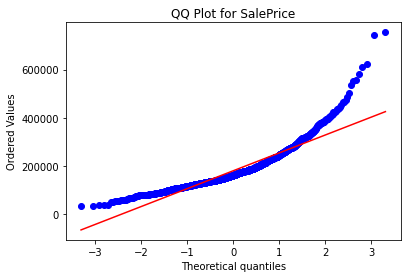

In [27]:
import matplotlib.pyplot as plt
from scipy import stats

stats.probplot(x=train_cp['SalePrice'], dist="norm", plot=plt)
plt.title("QQ Plot for SalePrice")
plt.show()

In [28]:
transformed_price, lambda_price = stats.boxcox(train_cp['SalePrice'])
lambda_price

-0.07692391328663316

In [29]:
ols_str_log = 'np.log(SalePrice) ~ MSZoning + RoofMatl + BsmtQual + OverallQual + OverallCond +  BsmtFinSF1 + TotalBsmtSF + PoolArea + LotArea + GrLivArea + SecondFlrSF + GarageCars + TotRmsAbvGrd + KitchenAbvGr + YearBuilt + ScreenPorch + WoodDeckSF + GarageQual + LandContour'
#ols_str_p = ols_str_p[0:-2]
#ols_str_p
model_ols_log = sm.ols(formula=ols_str_log, data=train_cp_colname)
fitted_ols_log = model_ols_log.fit()
print(fitted_ols_log.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     306.8
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:06:29   Log-Likelihood:                 898.60
No. Observations:                1349   AIC:                            -1725.
Df Residuals:                    1313   BIC:                            -1538.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.3800    

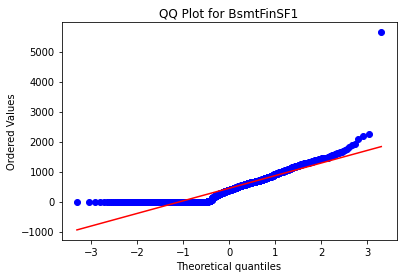

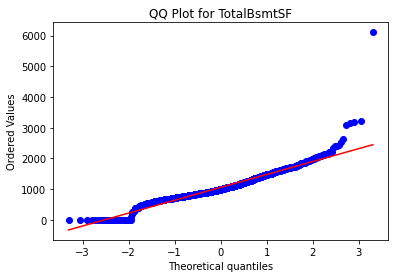

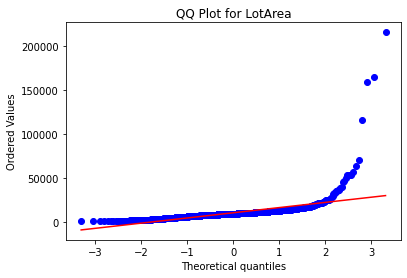

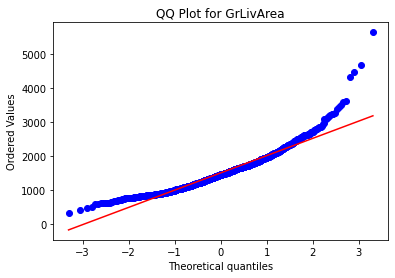

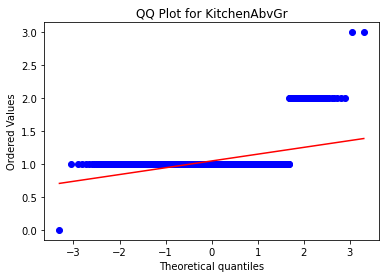

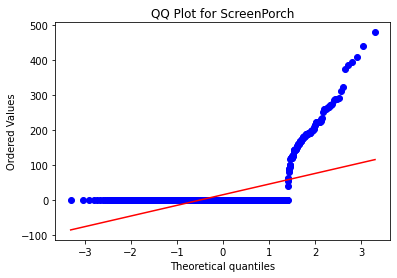

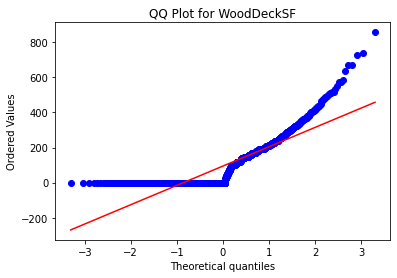

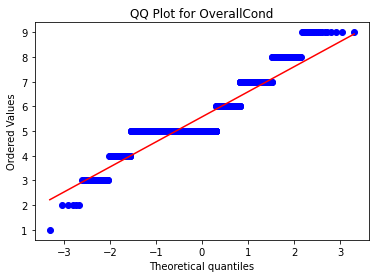

In [30]:
for col in ['BsmtFinSF1','TotalBsmtSF','LotArea','GrLivArea','KitchenAbvGr','ScreenPorch','WoodDeckSF','OverallCond']:
    stats.probplot(x=train_cp[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot for {col}")
    plt.show()

In [31]:
for col in ['BsmtFinSF1','TotalBsmtSF','LotArea','GrLivArea','KitchenAbvGr','ScreenPorch','WoodDeckSF','OverallCond']:
    try: 
        transformed_price, lambda_price = stats.boxcox(train_cp[col])
        print(f'Box-Cox of {col}: ',lambda_price)
    except ValueError:
        print(f"{col}'s values are not all positive!")

BsmtFinSF1's values are not all positive!
TotalBsmtSF's values are not all positive!
Box-Cox of LotArea:  0.03094631071248529
Box-Cox of GrLivArea:  0.006304841218621503
KitchenAbvGr's values are not all positive!
ScreenPorch's values are not all positive!
WoodDeckSF's values are not all positive!
Box-Cox of OverallCond:  0.41391222511848924


In [32]:
ols_str_log = 'np.log(SalePrice) ~ C(MSZoning) + C(RoofMatl) + C(BsmtQual) + C(OverallQual) + C(OverallCond) +  BsmtFinSF1 + TotalBsmtSF + np.log(LotArea) + np.log(GrLivArea) + GarageCars + TotRmsAbvGrd + C(KitchenAbvGr) + YearBuilt + ScreenPorch + WoodDeckSF + C(LandContour)'
#ols_str_p = ols_str_p[0:-2]
#ols_str_p
model_ols_log = sm.ols(formula=ols_str_log, data=train_cp_colname)
fitted_ols_log = model_ols_log.fit()
print(fitted_ols_log.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     286.9
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:06:32   Log-Likelihood:                 972.03
No. Observations:                1423   AIC:                            -1852.
Df Residuals:                    1377   BIC:                            -1610.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [33]:
from sklearn.model_selection import train_test_split as tts

Xtts = train_cp_colname.drop(columns='SalePrice')
ytts = train_cp_colname['SalePrice']

Xtrain_tts, Xtest_tts, ytrain_tts, ytest_tts = tts(Xtts, ytts, train_size=0.90, random_state=0)

In [34]:
Xtrain_tts['SalePrice'] = ytrain_tts
Xtest_tts['SalePrice'] = ytest_tts
ols_str_log = 'np.log(SalePrice) ~ C(MSZoning) + C(RoofMatl) + C(BsmtQual) + OverallQual + C(OverallCond) +  BsmtFinSF1 + TotalBsmtSF + np.log(LotArea) + np.log(GrLivArea) + GarageCars + TotRmsAbvGrd + C(KitchenAbvGr) + YearBuilt + ScreenPorch + WoodDeckSF + C(LandContour)'
#ols_str_p = ols_str_p[0:-2]
#ols_str_p
model_ols_logtts = sm.ols(formula=ols_str_log, data=Xtrain_tts)
fitted_ols_logtts = model_ols_logtts.fit()
print(fitted_ols_logtts.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     296.7
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:06:32   Log-Likelihood:                 846.80
No. Observations:                1282   AIC:                            -1616.
Df Residuals:                    1243   BIC:                            -1415.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
def RMSE(prediction,true_values):
    
    return np.sqrt(                                                          # Root
            np.mean(                                                      # Mean
                np.square(                                                # Squared
                         prediction-true_values                           # Error
                )
            )
        )

def MAE(prediction,true_values):
    return np.mean(                                                      # Mean
                np.abs(                                                   # Absolute
                        prediction-true_values                            # Error
                    )
                )

def MAPE(prediction,true_value):
    return np.mean(                                           # Mean
        np.abs(                                               # Absolute
               (prediction-true_value)/true_value             # Error
            )*100                                            # Percentage
    )

In [36]:
print("RMSE between model_log and log of true Sale price:", RMSE(fitted_ols_logtts.predict(Xtest_tts.drop(columns='SalePrice')), np.log(ytest_tts)))
print("RMSE between exp(model_log) and true Sale price:", RMSE(np.exp(fitted_ols_logtts.predict(Xtest_tts.drop(columns='SalePrice'))), ytest_tts))

RMSE between model_log and log of true Sale price: 0.11363409678151537
RMSE between exp(model_log) and true Sale price: 24857.9161698642


In [37]:
print("MAE between model_log and log of true Sale price:", MAE(fitted_ols_logtts.predict(Xtest_tts.drop(columns='SalePrice')), np.log(ytest_tts)))
print("MAE between exp(model_log) and true Sale price:", MAE(np.exp(fitted_ols_logtts.predict(Xtest_tts.drop(columns='SalePrice'))), ytest_tts))

MAE between model_log and log of true Sale price: 0.08736229717366872
MAE between exp(model_log) and true Sale price: 15847.558683333978


In [38]:
print("MAPE between model_log and log of true Sale price:", MAPE(fitted_ols_logtts.predict(Xtest_tts.drop(columns='SalePrice')), np.log(ytest_tts)))
print("MAPE between exp(model_log) and true Sale price:", MAPE(np.exp(fitted_ols_logtts.predict(Xtest_tts.drop(columns='SalePrice'))), ytest_tts))

MAPE between model_log and log of true Sale price: 0.7272355563734959
MAPE between exp(model_log) and true Sale price: 8.616713948995507


In [39]:
train_cp['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## **Predictions**

In [40]:
test_cp = test_set.copy()
test_cp.drop(columns=['Street','Utilities','LandSlope','Condition2'],inplace=True)
test_cp_colname = test_cp.rename(columns={'1stFlrSF':'FirstFlrSF', '2ndFlrSF':'SecondFlrSF', '3SsnPorch':'ThreeSsnPorch'})

In [41]:
test_pred = np.exp(fitted_ols_log.predict(test_cp_colname))

In [42]:
test_pred_df = pd.DataFrame({'Id': test_set['Id'], 'SalePrice': test_pred})
test_pred_df['SalePrice'][test_pred_df['SalePrice'].isnull()] = test_pred_df['SalePrice'].describe()['25%']

test_pred_df.to_csv('house_price_submission.csv', index=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

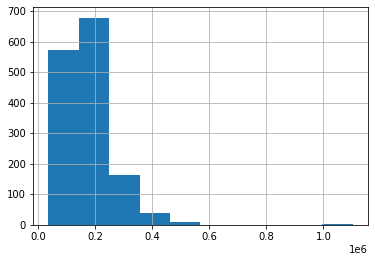

In [43]:
test_pred_df['SalePrice'].hist()

In [44]:
Xtrain_tts

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_Cat,SalePrice
930,20,RL,8925,IR1,HLS,Inside,Timber,Norm,1Fam,1Story,...,0,0,0,0,7,2009,WD,Normal,2,201000
656,20,RL,10007,IR1,Lvl,Inside,NAmes,Norm,1Fam,1Story,...,0,0,0,0,8,2008,WD,Normal,1,145500
45,120,RL,7658,Reg,Lvl,Inside,NridgHt,Norm,TwnhsE,1Story,...,0,0,0,0,2,2010,WD,Normal,3,319900
1348,20,RL,16196,IR3,Low,Inside,SawyerW,Norm,1Fam,1Story,...,0,0,0,0,8,2007,WD,Normal,2,215000
55,20,RL,10175,IR1,Lvl,Inside,NAmes,Norm,1Fam,1Story,...,407,0,0,0,7,2008,WD,Normal,1,180500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,RL,9430,Reg,Lvl,Inside,NoRidge,Norm,1Fam,2Story,...,0,180,0,0,7,2009,WD,Normal,3,337000
835,20,RL,9600,Reg,Lvl,Inside,Sawyer,Norm,1Fam,1Story,...,0,0,0,0,2,2010,WD,Normal,1,128000
1216,90,RM,8930,Reg,Lvl,Inside,Sawyer,RRAe,Duplex,1.5Fin,...,0,0,0,0,4,2010,WD,Normal,1,112000
559,120,RL,3196,Reg,Lvl,Inside,Blmngtn,Norm,TwnhsE,1Story,...,0,0,0,0,10,2006,WD,Normal,2,234000


In [45]:
#from tensorflow.keras.utils import to_categorical

#Xtrain_tts[['SalePrice ~ C(MSZoning) + C(RoofMatl) + C(BsmtQual) + OverallQual + C(OverallCond) +  BsmtFinSF1 + TotalBsmtSF + np.log(LotArea) + np.log(GrLivArea) + GarageCars + TotRmsAbvGrd + C(KitchenAbvGr) + YearBuilt + ScreenPorch + WoodDeckSF + C(LandContour)']]
#to_categorical(Xtrain_tts.values)

def normalize(df):
    df -= df.mean()
    df /= df.std()
    
    return df

xfull = train_cp_colname[['MSZoning','RoofMatl','BsmtQual','OverallQual','OverallCond','BsmtFinSF1','TotalBsmtSF','LotArea','GrLivArea','GarageCars','TotRmsAbvGrd','KitchenAbvGr','YearBuilt','ScreenPorch','WoodDeckSF','LandContour']]
yfull = train_cp_colname['SalePrice']

xfull = pd.get_dummies(xfull).astype('float32')

xfull = normalize(xfull) 

In [46]:
xval = xfull[:200]
#ytrain = train_cp_colname['SalePrice']
xtrain = xfull[200:]

yval = yfull[:200]
ytrain = yfull[200:]

In [47]:
from keras import layers, Sequential, models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(xtrain.shape[-1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(
      xtrain.values,
      ytrain,
      epochs = 500,
      batch_size = 512,
      validation_data = (xval.values, yval)
  )


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/500
3/3 [==============================] - 1s 108ms/step - loss: 39030263808.0000 - mae: 180693.4062 - val_loss: 39096619008.0000 - val_mae: 182357.7969
Epoch 2/500
3/3 [==============================] - 0s 24ms/step - loss: 39029981184.0000 - mae: 180692.6406 - val_loss: 39096418304.0000 - val_mae: 182357.2812
Epoch 3/500
3/3 [==============================] - 0s 21ms/step - loss: 39029784576.0000 - mae: 180692.1406 - val_loss: 39096238080.0000 - val_mae: 182356.7969
Epoch 4/500
3/3 [==============================] - 0s 24ms/step - loss: 39029608448.0000 - mae: 180691.6875 - val_loss: 39096057856.0000 - val_mae: 182356.3125
Epoch 5/500
3/3 [==============================] - 0s 24ms/step - loss: 39029428224.0000 - mae: 180691.2031 - val_loss: 39095869440.0000 - val_mae: 182355.8750
Epoch 6/500
3/3 [==============================] - 0s 20ms/step - loss: 39029239808.0000 - mae: 180690.7188 - val_loss: 39095672832.0000 - val_mae: 182355.3594
Epoch 7/500
3/3 [======================